## Formation energy as  chemical potential vary ##

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

 #### Total Energies in eV

In [2]:

E0=-3325083.824431094 # pristine
E1=-3335963.299011943 # addon S
E2=-3314200.125378767 # mono S vacancy
E3=-3303316.491191206 # di S vacancy up&down
E4=-3303316.476018199 # di S vacancy neighboring
E5=-3213835.070481706  # mono Mo vacancy
E_MoS2=-133003.350424015 # primtitive
ES8=-87044.115400996
EMo=-222479.115614341
mu_MoS2=E0/75

### For S8 Ring:

In [3]:

mu_S8=ES8/8


 ## $$ E^{d}_{f}=E_{defect}(n_{i}+\Delta n_{i})-E_{pristine}(n_{i}) - \sum_{i} \Delta n_{i} \mu_{i} $$
 
## $$  E^{Bulk}_{MoS_{2}}-2\mu_{S8} \leq \mu_{Mo} \leq \mu^{Bulk}_{Mo} $$
## $$ \frac{1}{2}(E_{MoS2}-\mu^{Bulk}_{Mo})\leq \mu_{S} \leq \mu_{S8} $$


### For Mo BCC Bulk:

In [4]:

mu_Mobcc=EMo/2

low S -10881.896308422249
low Mo -111239.5578071705
high S -10880.5144251245
H2S -10880.941715413
delta H2S -0.42729028850044415


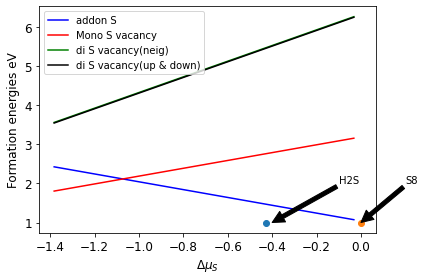

[-1.3818833 -1.3318833 -1.2818833 -1.2318833 -1.1818833 -1.1318833
 -1.0818833 -1.0318833 -0.9818833 -0.9318833 -0.8818833 -0.8318833
 -0.7818833 -0.7318833 -0.6818833 -0.6318833 -0.5818833 -0.5318833
 -0.4818833 -0.4318833 -0.3818833 -0.3318833 -0.2818833 -0.2318833
 -0.1818833 -0.1318833 -0.0818833 -0.0318833]


In [25]:
mu_S0_i=0.5*(E_MoS2-mu_Mobcc)
print('low S', mu_S0_i)
mu_Mo_i=E_MoS2-2*mu_S0_i
print('low Mo', mu_Mo_i)
#mu_Mo_f=mu_Mobcc

mu_S0_f=mu_S8
print('high S', mu_S0_f)
#x=(-10912.734399299+(0.5*-4089.358291683)-(-2080.759643872))
#print(mu_S0_f)
#print(x)
x=-10880.941715413
#x=x-mu_S0_f
print('H2S',x)
print('delta H2S',x-mu_S0_f)
#mu_S0_f=x
mu_Mo_f=E_MoS2-2*mu_S0_f
mu_S0=arange(mu_S0_i,mu_S0_f,0.05)
mu_Mo0=arange(mu_Mo_f,mu_Mo_i,0.05)
Ef_addS =[] 
Ef_VS = []
Ef_VS2 =[]
Ef_VS22=[]
Ef_Mo=[]

for i in mu_S0:
    Ef_addS.append(E1-E0-i) 
    Ef_VS.append(E2-E0+i)
    Ef_VS2.append(E3-E0+2*i) 
    Ef_VS22.append(E4-E0+2*i)
    
for j in mu_Mo0:
    Ef_Mo.append(E5-E0+j)
    
plt.plot(mu_S0-mu_S0_f,Ef_addS,'b', label='addon S') 
plt.plot(mu_S0-mu_S0_f,Ef_VS,'r', label='Mono S vacancy') 
plt.plot(mu_S0-mu_S0_f,Ef_VS22, 'g', label='di S vacancy(neig)') 
plt.plot(mu_S0-mu_S0_f,Ef_VS2, 'k', label='di S vacancy(up & down)') 
#plt.plot(mu_Mo0-mu_Mo_f,Ef_Mo, 'magenta', label='Mono Mo vacancy') 
plt.xlabel(r'$\Delta \mu_S$', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.plot([x-mu_S0_f], [1], 'o')
plt.annotate('H2S', xy=(-0.4, 1), xytext=(-0.1, 2),
            arrowprops=dict(facecolor='black', shrink=0.0000005))
plt.plot([0], [1], 'o')
plt.annotate('S8', xy=(-0.0, 1), xytext=(0.2, 2),
            arrowprops=dict(facecolor='black', shrink=0.0000005))
plt.legend(fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#

plt.savefig('Ef_muS.png',dpi=400)

plt.show()
print(mu_S0-mu_S0_f)

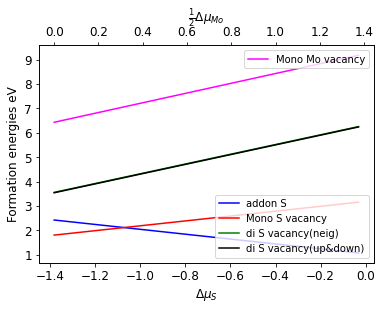

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)



ax1.plot(mu_S0-mu_S0_f,Ef_addS,'b', label='addon S') 
ax1.plot(mu_S0-mu_S0_f,Ef_VS,'r', label='Mono S vacancy') 
ax1.plot(mu_S0-mu_S0_f,Ef_VS22, 'g', label='di S vacancy(neig)') 
ax1.plot(mu_S0-mu_S0_f,Ef_VS2, 'k', label='di S vacancy(up&down)') 

ax1.set_xlabel(r'$\Delta \mu_{S}$', fontsize=12)
ax1.set_ylabel('Formation energies eV', fontsize=12)


#ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.19),
#          fancybox=True, shadow=True, ncol=5)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = ax1.twiny()
ax2.plot((mu_Mo0-mu_Mo_f)/2,Ef_Mo, 'magenta', label='Mono Mo vacancy') 
ax2.set_xlabel(r'$\frac{1}{2}\Delta \mu_{Mo}$', fontsize=12)
#ax.legend(loc=0)

#ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00),
#          ncol=3, fancybox=True, shadow=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#
ax1.legend(loc=4)
ax2.legend(loc=1)
#plt.tight_layout()
plt.savefig('Ef_mu_all.png',  bbox_inches="tight",dpi=400)
plt.savefig('Ef_mu_all.pdf')
plt.show()

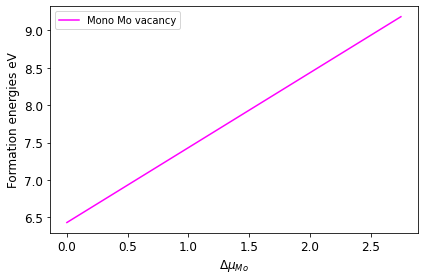

In [7]:
plt.plot(mu_Mo0-mu_Mo_f,Ef_Mo, 'magenta', label='Mono Mo vacancy') 

plt.xlabel(r'$\Delta \mu_{Mo}$', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#
plt.savefig('Ef_muMo.pdf')
plt.show()  